In [1]:
pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.6 MB/s 
     |████████████████████████████████| 4.2 MB 27.6 MB/s 
     |████████████████████████████████| 1.2 MB 48.0 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 596 kB 55.0 MB/s 
     |████████████████████████████████| 6.6 MB 44.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=9eb03ac4241c44cf4e7ee34983a36b8c099391da16b7a57d52503d491bc01872
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/LaBSE')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/804 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/461 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

In [3]:
import pandas as pd
gold_set = pd.read_csv('/content/paraphrases_gold.csv')
gold_set

,value/0/#text,value/0/@_name,value/1/#text,value/1/@_name,value/2/#text,value/2/@_name,value/3/#text,value/3/@_name,value/4/#text,value/4/@_name,value/5/#text,value/5/@_name
0,25349,id,34420,id_1,34421,id_2,Цены на нефть восстанавливаются,text_1,Парламент Словакии поблагодарил народы бывшего...,text_2,-1,class
1,25360,id,34438,id_1,34439,id_2,"""Гоголь-центр"" покажет видеозапись скандальног...",text_1,Кехман запретил «Гоголь-центру» показывать вид...,text_2,-1,class
2,25382,id,34475,id_1,34476,id_2,Агент: РФС вновь задерживает зарплату Фабио Ка...,text_1,СМИ: Агент Фабио Капелло грозится подать в суд...,text_2,-1,class
3,25423,id,34494,id_1,34519,id_2,День Победы в Москве обещает выдаться облачным,text_1,Любляна отпразднует День Победы вместе с Москвой,text_2,-1,class
4,25430,id,34531,id_1,34532,id_2,Посол РФ в США: Россия будет бороться с попытк...,text_1,Правительство запланировало заработать на лоте...,text_2,-1,class
...,...,...,...,...,...,...,...,...,...,...,...,...
1919,28485,id,37600,id_1,37601,id_2,Девять человек пострадали при пожаре в жилом д...,text_1,При пожаре в жилом доме в центре Санкт-Петербу...,text_2,1,class
1920,28486,id,37602,id_1,37603,id_2,"""Химки"" победили ""Локомотив-Кубань"" и сыграют ...",text_1,"""Химки"" обыграли ""Локомотив-Кубань"" и вышли в ...",text_2,0,class
1921,28499,id,37606,id_1,37618,id_2,Полицейские в США застрелили афроамериканца в ...,text_1,Полицейский в США спас мужчину от наводнения и...,text_2,-1,class
1922,28510,id,37604,id_1,37636,id_2,"Полицейский в США спас мужчину от наводнения, ...",text_1,Washington Post: В 2015 году полицейские США з...,text_2,-1,class


In [4]:
df_1 = gold_set[gold_set['value/5/#text'] == 1]
df_1

,value/0/#text,value/0/@_name,value/1/#text,value/1/@_name,value/2/#text,value/2/@_name,value/3/#text,value/3/@_name,value/4/#text,value/4/@_name,value/5/#text,value/5/@_name
5,25431,id,34533,id_1,34534,id_2,Вертолет с 11 иностранцами на борту упал в Пак...,text_1,В Пакистане упал вертолет с 11 иностранцами,text_2,1,class
6,25432,id,34535,id_1,34536,id_2,Самолет вернулся в аэропорт Новосибирска из-за...,text_1,Самолет вернулся в новосибирский аэропорт из-з...,text_2,1,class
9,25443,id,34556,id_1,34557,id_2,Суд оправдал Васильеву в хищении акций на два ...,text_1,Суд оправдал Васильеву в хищении акций на 2 мл...,text_2,1,class
10,25447,id,34560,id_1,34561,id_2,Пушков: у Обамы не хватило духа лично поздрави...,text_1,Пушков: Обама не нашел в себе духа лично поздр...,text_2,1,class
11,25448,id,34562,id_1,34563,id_2,МЧС РФ: тела погибших российских дипломатов до...,text_1,Тела погибших в Непале российских дипломатов д...,text_2,1,class
...,...,...,...,...,...,...,...,...,...,...,...,...
1913,28473,id,37587,id_1,37588,id_2,Источник в МИД: Россия ввела визовые ограничен...,text_1,Визовые ограничения со стороны России стали от...,text_2,1,class
1915,28479,id,37584,id_1,37593,id_2,Саркози раскритиковал Олланда за отказ от посе...,text_1,Саркози осудил отказ Олланда приехать в Москву...,text_2,1,class
1916,28481,id,37594,id_1,37595,id_2,Почти 30 человек стали жертвами взрыва в мечет...,text_1,Не менее 26 человек погибли в результате терак...,text_2,1,class
1918,28483,id,37596,id_1,37597,id_2,Пушков: Саакашвили в Грузии мог бы возглавить ...,text_1,Пушков заявил о способности Саакашвили возглав...,text_2,1,class


In [5]:
sentences1 = df_1['value/3/#text'].tolist()
embeddings1 = model.encode(sentences1)

In [6]:
sentences2 = df_1['value/4/#text'].tolist()
embeddings2 = model.encode(sentences2)

In [7]:
import torch
cos = torch.nn.CosineSimilarity(dim=1)
one = cos(torch.from_numpy(embeddings1), torch.from_numpy(embeddings2))
one

tensor([0.9808, 0.8975, 0.9833, 0.9125, 0.9000, 0.9332, 0.7724, 0.9397, 0.9528,
        0.9334, 0.9931, 0.8046, 0.8915, 0.9020, 0.7855, 0.9529, 0.8697, 0.9969,
        0.9536, 0.9752, 0.8911, 0.9396, 0.9162, 0.9215, 0.8795, 0.8795, 0.7808,
        0.7590, 0.9357, 0.9984, 0.9392, 0.9926, 0.9652, 0.9123, 0.9169, 0.8094,
        0.8917, 0.6353, 0.9917, 0.8381, 0.9214, 0.8875, 0.7577, 0.9791, 0.9339,
        0.9710, 0.8040, 0.8247, 0.7697, 0.8673, 0.7384, 0.8162, 0.9267, 0.9330,
        0.9987, 0.9710, 0.8981, 0.9094, 0.9262, 0.9098, 0.7826, 0.9397, 0.9141,
        0.6295, 0.8560, 0.9284, 0.9285, 0.9575, 0.9607, 0.9096, 0.8742, 0.8026,
        0.9401, 0.7758, 0.9516, 0.9680, 0.9612, 0.9494, 0.8353, 0.9216, 0.8746,
        0.8913, 0.9832, 0.8899, 0.9795, 0.9529, 0.8189, 0.9783, 0.8853, 0.9570,
        0.8158, 0.9307, 0.9692, 0.9386, 0.9033, 0.9219, 0.8523, 0.9295, 0.9545,
        0.8964, 0.9308, 0.8691, 0.8354, 0.7888, 0.8088, 0.9682, 0.9735, 0.8846,
        0.9431, 0.9059, 0.9626, 0.9361, 

In [8]:
import numpy as np
np.mean(np.array(one))

0.8908037

In [9]:
np.std(np.array(one))

0.077982455

In [10]:
df_2 = gold_set[gold_set['value/5/#text'] == 0]
df_2

,value/0/#text,value/0/@_name,value/1/#text,value/1/@_name,value/2/#text,value/2/@_name,value/3/#text,value/3/@_name,value/4/#text,value/4/@_name,value/5/#text,value/5/@_name
7,25438,id,34547,id_1,34546,id_2,Васильева признана виновной в мошенничестве и ...,text_1,Васильева признана виновной в хищениях и отмыв...,text_2,0,class
13,25456,id,34567,id_1,34568,id_2,Троих подростков-убийц поймали в Подмосковье,text_1,В Подмосковье трое подростков признались в сер...,text_2,0,class
20,25477,id,34590,id_1,34589,id_2,Лидер либдемов Ник Клегг подал в отставку посл...,text_1,Лидер британских лейбористов подал в отставку ...,text_2,0,class
26,25491,id,34605,id_1,34603,id_2,Консерваторы увеличили отрыв от лейбористов на...,text_1,Консерваторы победили на выборах в Британии,text_2,0,class
27,25492,id,34606,id_1,34607,id_2,Лавров о возможной встрече с Керри: готов встр...,text_1,Лавров заявил о готовности встретиться с Керри...,text_2,0,class
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,28455,id,37516,id_1,37566,id_2,В аэропортах Москвы из-за грозы задержаны и от...,text_1,Более 150 авиарейсов отменили в московских аэр...,text_2,0,class
1904,28456,id,37567,id_1,37568,id_2,Объекты инфраструктуры для ВС России в Арктике...,text_1,Все объекты военной инфраструктуры в Арктике с...,text_2,0,class
1910,28466,id,37574,id_1,37575,id_2,Пушилин назвал насмешкой над Украиной назначен...,text_1,Медведев назвал назначение Саакашвили «продолж...,text_2,0,class
1914,28475,id,37591,id_1,37590,id_2,Россия планирует создать войска быстрого реаги...,text_1,В России появятся войска быстрого реагирования...,text_2,0,class


In [11]:
sentences1 = df_2['value/3/#text'].tolist()
embeddings1 = model.encode(sentences1)

In [12]:
sentences2 = df_2['value/4/#text'].tolist()
embeddings2 = model.encode(sentences2)

In [13]:
import torch
cos = torch.nn.CosineSimilarity(dim=1)
zero = cos(torch.from_numpy(embeddings1), torch.from_numpy(embeddings2))
zero

tensor([0.9656, 0.8754, 0.6940, 0.8580, 0.8292, 0.8310, 0.8252, 0.5469, 0.5332,
        0.7694, 0.8647, 0.6437, 0.7584, 0.8758, 0.9957, 0.9136, 0.9115, 0.9048,
        0.8179, 0.7206, 0.9129, 0.5719, 0.6581, 0.7725, 0.7431, 0.8754, 0.8457,
        0.6285, 0.8300, 0.7497, 0.9629, 0.6359, 0.5749, 0.8655, 0.9020, 0.6382,
        0.9477, 0.4021, 0.7654, 0.7685, 0.9748, 0.6625, 0.7763, 0.8072, 0.9294,
        0.7124, 0.6534, 0.8473, 0.7788, 0.8060, 0.8580, 0.6371, 0.6324, 0.7599,
        0.6410, 0.8108, 0.9287, 0.8672, 0.7071, 0.9091, 0.8038, 0.8420, 0.8431,
        0.8868, 0.6848, 0.8410, 0.9129, 0.9700, 0.9150, 0.9461, 0.7846, 0.6264,
        0.8971, 0.7002, 0.6844, 0.7809, 0.7469, 0.7883, 0.7195, 0.8648, 0.6438,
        0.7924, 0.8300, 0.9437, 0.9301, 0.8974, 0.7201, 0.7825, 0.8688, 0.7019,
        0.8651, 0.9633, 0.7079, 0.8239, 0.9313, 0.7977, 0.9232, 0.8139, 0.9209,
        0.9286, 0.7940, 0.6349, 0.6914, 0.8886, 0.7691, 0.8435, 0.7922, 0.7212,
        0.8376, 0.7883, 0.8789, 0.7140, 

In [14]:
np.mean(np.array(zero))

0.8083653

In [15]:
np.std(np.array(zero))

0.09969515

In [16]:
df_3 = gold_set[gold_set['value/5/#text'] == -1]
df_3

,value/0/#text,value/0/@_name,value/1/#text,value/1/@_name,value/2/#text,value/2/@_name,value/3/#text,value/3/@_name,value/4/#text,value/4/@_name,value/5/#text,value/5/@_name
0,25349,id,34420,id_1,34421,id_2,Цены на нефть восстанавливаются,text_1,Парламент Словакии поблагодарил народы бывшего...,text_2,-1,class
1,25360,id,34438,id_1,34439,id_2,"""Гоголь-центр"" покажет видеозапись скандальног...",text_1,Кехман запретил «Гоголь-центру» показывать вид...,text_2,-1,class
2,25382,id,34475,id_1,34476,id_2,Агент: РФС вновь задерживает зарплату Фабио Ка...,text_1,СМИ: Агент Фабио Капелло грозится подать в суд...,text_2,-1,class
3,25423,id,34494,id_1,34519,id_2,День Победы в Москве обещает выдаться облачным,text_1,Любляна отпразднует День Победы вместе с Москвой,text_2,-1,class
4,25430,id,34531,id_1,34532,id_2,Посол РФ в США: Россия будет бороться с попытк...,text_1,Правительство запланировало заработать на лоте...,text_2,-1,class
...,...,...,...,...,...,...,...,...,...,...,...,...
1909,28464,id,37477,id_1,37572,id_2,Саакашвили может стать губернатором Одесской о...,text_1,Медведев назвал назвачение Саакашвили одесским...,text_2,-1,class
1917,28482,id,37501,id_1,37595,id_2,Шестнадцать человек погибли в результате авари...,text_1,Не менее 26 человек погибли в результате терак...,text_2,-1,class
1921,28499,id,37606,id_1,37618,id_2,Полицейские в США застрелили афроамериканца в ...,text_1,Полицейский в США спас мужчину от наводнения и...,text_2,-1,class
1922,28510,id,37604,id_1,37636,id_2,"Полицейский в США спас мужчину от наводнения, ...",text_1,Washington Post: В 2015 году полицейские США з...,text_2,-1,class


In [17]:
sentences1 = df_3['value/3/#text'].tolist()
embeddings1 = model.encode(sentences1)

In [18]:
sentences2 = df_3['value/4/#text'].tolist()
embeddings2 = model.encode(sentences2)

In [19]:
import torch
cos = torch.nn.CosineSimilarity(dim=1)
one_minus = cos(torch.from_numpy(embeddings1), torch.from_numpy(embeddings2))
one_minus

tensor([0.2828, 0.6761, 0.7777, 0.7145, 0.3505, 0.2407, 0.7671, 0.7215, 0.7900,
        0.4822, 0.6746, 0.4641, 0.7612, 0.6468, 0.7514, 0.5910, 0.7696, 0.7046,
        0.6324, 0.5788, 0.5886, 0.2826, 0.2768, 0.6935, 0.8098, 0.5702, 0.3168,
        0.5244, 0.6369, 0.7763, 0.6890, 0.6112, 0.4733, 0.8783, 0.7296, 0.5047,
        0.5418, 0.5985, 0.5795, 0.6055, 0.8828, 0.6881, 0.5839, 0.4304, 0.8185,
        0.6163, 0.7630, 0.7602, 0.7496, 0.6705, 0.6514, 0.4861, 0.5562, 0.6404,
        0.6588, 0.7168, 0.6614, 0.6094, 0.7858, 0.7475, 0.7417, 0.6060, 0.4791,
        0.6509, 0.9020, 0.7475, 0.7585, 0.7436, 0.7143, 0.6785, 0.5473, 0.4617,
        0.5599, 0.6648, 0.6409, 0.7285, 0.7399, 0.6391, 0.7138, 0.8083, 0.6736,
        0.7967, 0.6869, 0.4833, 0.5403, 0.4833, 0.5634, 0.5315, 0.7037, 0.7265,
        0.6171, 0.6693, 0.7271, 0.7385, 0.3885, 0.7699, 0.7334, 0.7102, 0.7371,
        0.6503, 0.7910, 0.8146, 0.6076, 0.7526, 0.6064, 0.6019, 0.9604, 0.7825,
        0.7189, 0.7844, 0.6129, 0.1406, 

In [20]:
np.mean(np.array(one_minus))

0.6582371

In [21]:
np.std(np.array(one_minus))

0.1494934

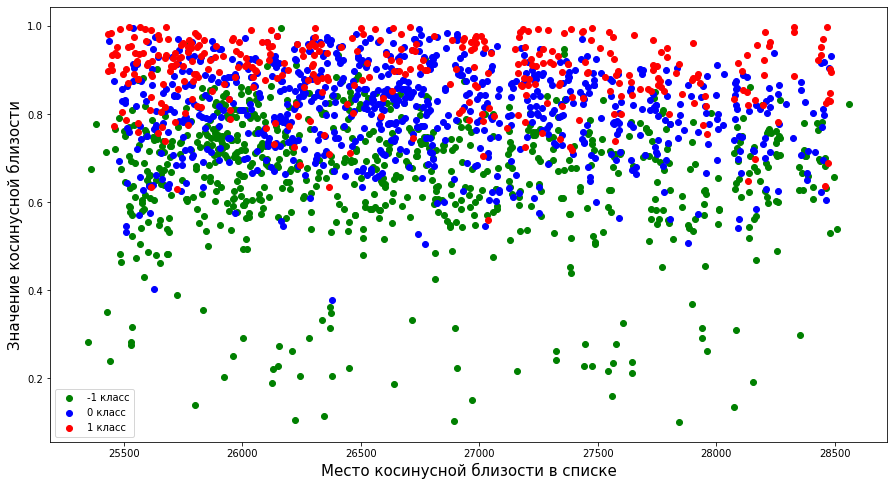

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

x1 = df_1['value/0/#text'].tolist()
y1 = one

x2 = df_2['value/0/#text'].tolist()
y2 = zero

x3 = df_3['value/0/#text'].tolist()
y3 = one_minus

ax.scatter(x3, y3, color = 'green', label = '-1 класс')
ax.scatter(x2, y2, color = 'blue', label = '0 класс')
ax.scatter(x1, y1, color = 'red', label = '1 класс')

ax.legend()

plt.xlabel("Место косинусной близости в списке", fontsize = 15)
plt.ylabel("Значение косинусной близости", fontsize = 15)

plt.show()